In [6]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [13]:
file_path = 'Injured and Dead in Accidents.csv'
df = pd.read_csv(file_path)
df['gregorian_date'] = pd.to_datetime(df['gregorian_date'])
df.drop(columns=['ID'], inplace=True)  # not needed
#df.drop(columns=['region_name'], inplace=True)  # not needed

df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1152 entries, 0 to 1151
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   hijri_year                1152 non-null   int64         
 1   gregorian_date            1152 non-null   datetime64[ns]
 2   gregorian_year            1152 non-null   int64         
 3   gregorian_month           1152 non-null   int64         
 4   gregorian_day             1152 non-null   int64         
 5   region_number             1152 non-null   int64         
 6   region_name               1152 non-null   object        
 7   male_count                1152 non-null   int64         
 8   female_count              1152 non-null   int64         
 9   age_under_18              1152 non-null   int64         
 10  age_18_to_30              1152 non-null   int64         
 11  age_30_to_40              1152 non-null   int64         
 12  age_40_to_50        

,hijri_year,gregorian_date,gregorian_year,gregorian_month,gregorian_day,region_number,region_name,male_count,female_count,age_under_18,age_18_to_30,age_30_to_40,age_40_to_50,age_over_50,saudi_national_count,non_saudi_national_count,death_flag,injured_flag,total_deaths,total_injuries
0,1437,2015-10-14,2015,10,14,1,riyadh,279,31,65,94,125,15,11,172,138,0,1,0,310
1,1437,2015-11-13,2015,11,13,1,riyadh,245,93,61,89,82,63,43,204,134,0,1,0,338
2,1437,2015-12-12,2015,12,12,1,riyadh,244,89,59,88,85,59,42,187,146,0,1,0,333
3,1437,2016-01-11,2016,1,11,1,riyadh,303,36,61,89,81,64,44,177,162,0,1,0,339
4,1437,2016-02-10,2016,2,10,1,riyadh,294,29,56,84,79,62,42,158,165,0,1,0,323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1439,2018-04-17,2018,4,17,16,alqurayyat,0,0,0,0,0,0,0,0,0,1,0,0,0
1148,1439,2018-05-16,2018,5,16,16,alqurayyat,5,3,1,3,1,0,3,3,5,1,0,8,0
1149,1439,2018-06-15,2018,6,15,16,alqurayyat,1,1,1,0,1,0,0,2,0,1,0,2,0
1150,1439,2018-07-14,2018,7,14,16,alqurayyat,4,0,0,3,0,0,1,4,0,1,0,4,0


In [14]:
# ============================================================
# 📦 Install plotly if needed
# ============================================================
# !pip install plotly

import pandas as pd
import plotly.express as px

# ============================================================
# 1️⃣ Prepare Data
# ============================================================
df['gregorian_date'] = pd.to_datetime(df['gregorian_date'])
df['year_month'] = df['gregorian_date'].dt.to_period('M').astype(str)

# Group by month and region_name
grouped = df.groupby(['year_month', 'region_name'])['total_deaths'].sum().reset_index()

# ============================================================
# 2️⃣ Create Plotly Animation
# ============================================================
fig = px.bar(
    grouped,
    x='region_name',
    y='total_deaths',
    color='region_name',
    animation_frame='year_month',
    range_y=[0, grouped['total_deaths'].max() + 5],
    labels={'total_deaths':'Total Deaths', 'region_name':'Region'},
    title='Monthly Traffic Deaths by Region in Saudi Arabia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_layout(
    xaxis=dict(type='category', tickangle=-45),
    plot_bgcolor='white',
    font=dict(size=14),
    showlegend=False
)

# ============================================================
# 3️⃣ Display Animation
# ============================================================
fig.show()

# ============================================================
# 4️⃣ Export as HTML (GIF direct export not supported natively)
# ============================================================
# fig.write_html("monthly_deaths_animation.html")


In [16]:
#🌟 2️⃣ Animated Scatter Plot: Deaths vs Injuries Over Months

df['year_month'] = df['gregorian_date'].dt.to_period('M').astype(str)

fig = px.scatter(
    df,
    x='total_injuries',
    y='total_deaths',
    animation_frame='year_month',
    color='region_name',
    size='total_deaths',
    hover_name='region_name',
    title='Animated Scatter: Injuries vs Deaths by Region Over Time',
    labels={'total_injuries':'Total Injuries', 'total_deaths':'Total Deaths'},
    size_max=30
)

fig.update_layout(plot_bgcolor='white')
fig.show()


In [17]:
#🌟 3️⃣ Animated Bar Chart Race: Top Regions by Deaths
import plotly.express as px

grouped = df.groupby(['year_month', 'region_name'])['total_deaths'].sum().reset_index()

fig = px.bar(
    grouped,
    x='region_name',
    y='total_deaths',
    color='region_name',
    animation_frame='year_month',
    title='Animated Bar Chart Race: Monthly Traffic Deaths by Region',
    labels={'total_deaths':'Total Deaths', 'region_name':'Region'}
)

fig.update_layout(xaxis={'categoryorder':'total descending'}, showlegend=False)
fig.show()


In [28]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


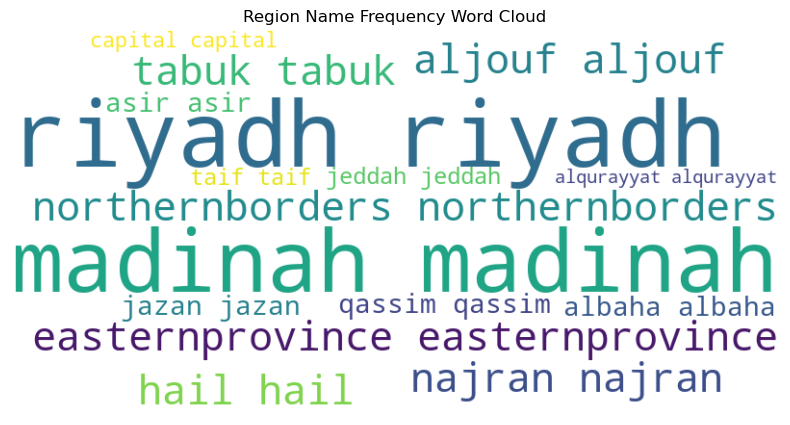

In [29]:
#Word Cloud of Region Names (Fun Thesis Visual)
#✔ Highlights regional frequency in data for visual interest.
from wordcloud import WordCloud

text = " ".join(df['region_name'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Region Name Frequency Word Cloud")
plt.show()


In [ ]:
#  Dual-Line Plot: Deaths & Injuries by Year
# !pip install plotly

import pandas as pd
import plotly.express as px

# Ensure 'gregorian_date' is datetime
df['gregorian_date'] = pd.to_datetime(df['gregorian_date'])

# Extract Gregorian year
df['gregorian_year'] = df['gregorian_date'].dt.year

# Group by year for deaths and injuries
yearly_summary = df.groupby('gregorian_year')[['total_deaths', 'total_injuries']].sum().reset_index()

# Melt dataframe for easier plotting of both metrics
yearly_melted = yearly_summary.melt(id_vars='gregorian_year', value_vars=['total_deaths', 'total_injuries'],
                                    var_name='Outcome', value_name='Count')

# Create interactive line chart
fig = px.line(
    yearly_melted,
    x='gregorian_year',
    y='Count',
    color='Outcome',
    markers=True,
    title='Total Traffic Deaths and Injuries in Saudi Arabia by Year',
    labels={'gregorian_year':'Year', 'Count':'Count', 'Outcome':'Outcome Type'},
    template='plotly_white',
    color_discrete_map={'total_deaths':'red', 'total_injuries':'orange'}
)

# Customize appearance
fig.update_traces(line=dict(width=3), marker=dict(size=8))
fig.update_layout(font=dict(size=14))

fig.show()


In [ ]:
#Side-by-Side Grouped Bar Charts with Year
# ✔ Shows each age group’s count by year
# ✔ Split into deaths and injuries for clear comparison

import pandas as pd
import plotly.express as px

# ✅ Prepare data
df['gregorian_date'] = pd.to_datetime(df['gregorian_date'])
df['gregorian_year'] = df['gregorian_date'].dt.year
df['Outcome Type'] = df.apply(lambda x: 'Death' if x['death_flag']==1 else 'Injury', axis=1)

# Age columns
age_cols = ['age_under_18', 'age_18_to_30', 'age_30_to_40', 'age_40_to_50', 'age_over_50']

# Melt dataset
age_melted = df.melt(
    id_vars=['gregorian_year', 'Outcome Type'],
    value_vars=age_cols,
    var_name='Age Group',
    value_name='Count'
)

# Group and summarize
age_summary = age_melted.groupby(['gregorian_year', 'Outcome Type', 'Age Group'])['Count'].sum().reset_index()

# 🔷 Plot with Plotly Express
fig = px.bar(
    age_summary,
    x='gregorian_year',
    y='Count',
    color='Age Group',
    barmode='group',
    facet_col='Outcome Type',
    title='Traffic Deaths and Injuries by Age Group and Year',
    labels={'gregorian_year':'Year', 'Count':'Count'},
    template='plotly_white',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Layout tweaks
fig.update_layout(font=dict(size=14))
fig.for_each_xaxis(lambda x: x.update(type='category'))

fig.show()
